# Сборный проект

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

**Цель исследования** - выявить определяющие успешность игры закономерности.

**Задачи исследования:**
1. Подготовить данные:
    - Заменить названия столбцов;
    - Преобразовать данные в нужные типы;
    - Обработать пропуски;
    - Посчитать суммарные продажи во всех регионах и записать их в отдельный столбец.
2. Посмотреть, сколько игр выпускалось в разные годы.
3. Посмотреть, как менялись продажи по платформам. Выберать платформы с наибольшими суммарными продажами и построить распределение по годам.
4. Для данных за соответствующий актуальный период:
    - Какие платформы лидируют по продажам, растут или падают? Выберать несколько потенциально прибыльных платформ.
    - Построить график «ящик с усами» по глобальным продажам игр в разбивке по платформам.
    - Посмотреть, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построить диаграмму рассеяния и посчитать корреляцию между отзывами и продажами.
    - Соотнести выводы с продажами игр на других платформах.
    - Посмотреть на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?
5. Составить портрет пользователя каждого региона:
    - Самые популярные платформы (топ-5). Описать различия в долях продаж.
    - Самые популярные жанры (топ-5). Пояснить разницу.
    - Влияет ли рейтинг ESRB на продажи в отдельном регионе?
6. Проверить гипотезы:
    - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
    - Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

## Обзор данных

Импортируем необходимые для работы библиотеки.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st

Прочитаем файл с данными и сохраним его в переменной

In [2]:
df =  pd.read_csv('/datasets/games.csv')

Изучим первые 10 строк таблицы.

In [3]:
df.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


Сразу можно заметить некорректные названия столбцов, пропуски в данных, а также неверные форматы данных. Исправлять ошибки мы будем на следующем этапе.

Посмотрим информацию о столбцах.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Согласно документации к данным **Name** — название игры,**Platform** — платформа, **Year_of_Release** — год выпуска, **Genre** — жанр игры, **NA_sales** — продажи в Северной Америке (миллионы проданных копий), **EU_sales** — продажи в Европе (миллионы проданных копий), **JP_sales** — продажи в Японии (миллионы проданных копий), **Other_sales** — продажи в других странах (миллионы проданных копий), **Critic_Score** — оценка критиков (максимум 100), **User_Score** — оценка пользователей (максимум 10), **Rating** — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Также указано, что за 2016 год данные могут быть неполными.

Посмотрим количество пропусков в датасете.

In [5]:
print(df.isna().sum())

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64


Мы видим, что пропущенно довольно много данных. Нужно будет разобраться с причинами пропусков, заполнить или удалить пустые строки.

### Вывод

Исходя из предварительного обзора данных мы видим, что для дальнейшей работы нам необходимо привести названия столбцов к одному регистру, изменить тип данных на подходящий, заполнить пропуски.

## Предобработка данных

Приведём в порядок наименования столбцов.

In [6]:
df.columns = df.columns.str.lower()

Вероятно тот, кто формировал таблицу, по привычке писал названия столбцов с большой буквы. Может быть, что таблицу формировали несколько человек, так как после разделителя _ некоторые наименования написаны снова с заглавной буквы.

В остальных столбцах пока оставим числа с плавающей точкой, так как рейтинг складывается как среднее значение из всех выставленных оценок и только в редких случаях бывает целым числом. Столбцы с миллионами проданных копий пока тоже оставим с плавающей точкой, так как в этом случае обрезали нули, но оставляли тысячи, изменим их позже, если возникнет необходимость.

Проверим наличие дубликатов в данных.

In [7]:
print(df.duplicated().sum())

0


In [8]:
df[df.duplicated(subset=['name', 'platform'], keep=False)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,Madden NFL 13,PS3,2012.0,Sports,2.11,0.22,0.00,0.23,83.0,5.5,E
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
1190,Need for Speed: Most Wanted,X360,2012.0,Racing,0.62,0.78,0.01,0.15,83.0,8.5,T
1591,Need for Speed: Most Wanted,X360,2005.0,Racing,1.00,0.13,0.02,0.10,83.0,8.5,T
1745,Sonic the Hedgehog,PS3,2006.0,Platform,0.41,0.06,0.04,0.66,43.0,4.1,E10+
4127,Sonic the Hedgehog,PS3,NaN,Platform,0.00,0.48,0.00,0.00,43.0,4.1,E10+
5972,Need for Speed: Most Wanted,PC,2005.0,Racing,0.02,0.23,0.00,0.04,82.0,8.5,T
11715,Need for Speed: Most Wanted,PC,2012.0,Racing,0.00,0.06,0.00,0.02,82.0,8.5,T
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN
16230,Madden NFL 13,PS3,2012.0,Sports,0.00,0.01,0.00,0.00,83.0,5.5,E


Судя по году выпуска в это время выходила новая версия игры, также видим разную сумму продаж по регионам, поэтому не стоит удалять эти строки.

Дубликаты отсутствуют, перейдём к обработке пропусков. В столбце с наименованием игры отсутствуют два значения, восстановить их не представляется возможным, поэтому удалим эти строки. К тому же 2 строки по сравнению с 1675 строками незначительны.

In [10]:
df.dropna(subset=['name'], inplace=True)

Проверим корректность данных столбца platform.

In [11]:
df['platform'].value_counts()

PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      430
PS4      392
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
GB        98
NES       98
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
PCFX       1
GG         1
Name: platform, dtype: int64

С данными всё в порядке. Рассмотрим столбец с годом выпуска игр, в нём есть пропуски.

In [12]:
df['year_of_release'].value_counts()

2008.0    1427
2009.0    1426
2010.0    1255
2007.0    1197
2011.0    1136
2006.0    1006
2005.0     939
2002.0     829
2003.0     775
2004.0     762
2012.0     653
2015.0     606
2014.0     581
2013.0     544
2016.0     502
2001.0     482
1998.0     379
2000.0     350
1999.0     338
1997.0     289
1996.0     263
1995.0     219
1994.0     121
1993.0      60
1981.0      46
1992.0      43
1991.0      41
1982.0      36
1986.0      21
1989.0      17
1983.0      17
1987.0      16
1990.0      16
1988.0      15
1984.0      14
1985.0      14
1980.0       9
Name: year_of_release, dtype: int64

In [13]:
print('Кол-во пропусков =', df['year_of_release'].isna().sum())

Кол-во пропусков = 269


In [14]:
(df['year_of_release'].isna().sum())/16715

0.01609332934489979

Восстановить год выпуска игр довольно проблематично, 269 строк - это 1% от общего объёма данных. Их можно удалить.

In [15]:
df.dropna(subset=['year_of_release'], inplace=True)

In [16]:
df.shape[0]/16715

0.9837870176488184

Посмотрим на столбец genre.

In [17]:
df['genre'].value_counts()

Action          3307
Sports          2306
Misc            1721
Role-Playing    1481
Shooter         1296
Adventure       1293
Racing          1226
Platform         878
Simulation       857
Fighting         837
Strategy         673
Puzzle           569
Name: genre, dtype: int64

С данными здесь всё в порядке. Теперь перейдём к столбцу critic_score, в котором имеются пропуски.

In [18]:
df['critic_score'].value_counts(dropna=False)

NaN     8461
70.0     252
71.0     248
75.0     240
80.0     235
        ... 
20.0       3
29.0       3
21.0       1
17.0       1
13.0       1
Name: critic_score, Length: 82, dtype: int64

In [19]:
df[['critic_score']].describe()

,critic_score
count,7983.000000
mean,68.994363
std,13.920060
min,13.000000
25%,60.000000
50%,71.000000
75%,79.000000
max,98.000000


In [20]:
print(df['critic_score'].isna().sum()/len(df))

0.5145341765993675


Так как процент пропусков довольно большой, то их удалять не следует, так как дадасет будет обеднён, что может отразиться на данных.

Пропущенные значения не будут учитываться при выполнении некоторых операций, поэтому нужно заполнить их так, чтобы это не исказило результаты анализа. Для этого заменим их на 0.0.

In [21]:
df['critic_score'] = df['critic_score'].fillna('0.0') 

In [22]:
df['critic_score'] = df['critic_score'].astype(float)

Рассмотрим столбец с оценкой пользователей.

In [23]:
df['user_score'].value_counts(dropna=False)

NaN    6605
tbd    2376
7.8     322
8       285
8.2     276
       ... 
1.1       2
0.5       2
0.2       2
9.7       1
0         1
Name: user_score, Length: 97, dtype: int64

In [24]:
df['user_score'].describe()

count     9839
unique      96
top        tbd
freq      2376
Name: user_score, dtype: object

В описании задания обращают ввнимание на аббревиатуру 'tbd' в данном столбце. TBD = to be determined. В переводе с английского - подлежит определению. Посмотрим на эти строки. Возможно, эта аббревиатура используется в рейтинге недавно вышедших игр.

In [25]:
display(df[df['user_score']=="tbd"])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010.0,Sports,3.45,2.59,0.0,0.66,0.0,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005.0,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011.0,Sports,1.51,1.03,0.0,0.27,0.0,tbd,T
645,uDraw Studio,Wii,2010.0,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
718,Just Dance Kids,Wii,2010.0,Misc,1.52,0.54,0.0,0.18,0.0,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001.0,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16697,Bust-A-Move 3000,GC,2003.0,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16698,Mega Brain Boost,DS,2008.0,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16704,Plushees,DS,2008.0,Simulation,0.01,0.00,0.0,0.00,0.0,tbd,E


Мы видим, что tbd используется в рейтинге игр разных лет. В таком случае, примем его за пропуск и обработаем.

In [26]:
df.loc[df['user_score']=="tbd", 'user_score']=np.nan

In [27]:
print(df['user_score'].isna().sum()/len(df))

0.5461566528825104


Для чистоты данных здесь также заменим пропуски на 0.0.

In [28]:
df['user_score'] = df['user_score'].fillna('0.0') 

Изменим тип данных на float.

In [29]:
df['user_score'] = df['user_score'].astype(float)

Перейдём к следующему столбцу.

In [30]:
df['rating'].value_counts(dropna=False)

NaN     6676
E       3921
T       2905
M       1536
E10+    1393
EC         8
K-A        3
RP         1
AO         1
Name: rating, dtype: int64

В данном столбце также содержатся пропуски, которые невозможно заполнить, поэтому обработаем их также, как и в предыдущих столбцах. Тем не менее мы видим, что почти все игры распределились между категориями Е, Т, М и Е10+.

In [31]:
df['rating'] = df['rating'].fillna('Unknown') 

Я думаю, что причина пропусков в том, что данные хранились на различных сервисах, сайтах, но при формировании таблицы с данными доступа к сервисам, сайтам не было по техническим причинам, поэтому не удалось заполнить эти строки таблицы. Также можно заметить, что в большинстве случаев у игр есть пропуски во всех столбцах с рейтингом. Возможно, что данные как раз таки хранились в Американском рейтинговом агентстве и доступ отсутствовал.

По заданию необходимо добавить столбец с суммарными продажами во всех регионах, назовём его total_sales.

In [32]:
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

Убедимся, что данные в столбце корректны.

In [33]:
display(df.head())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,0.0,0.0,Unknown,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,0.0,0.0,Unknown,31.38


### Вывод

В ходе предобработки данных мы привели наименования столбцов к нижнему регистру, изменили тип данных, удалили несколько строк с пропусками, обработали пропущенные значения, которые невозможно было восстановить, выяснили, что большинство пропусков заполнить не удастся, как и удалить эти строки, и добавили столбец, в котором подсчитали сумму продаж во всех регионах. Далее будем работать с этими данными.

## Исследовательский анализ данных

Посмотрим сколько игр выпускалось в разные годы и насколько важны для исследования данные за все годы. Создадим таблицу.

In [34]:
time_release = df.groupby('year_of_release')['name'].count().reset_index()
time_release.columns = ['year', 'quantity']

In [35]:
display(time_release)

,year,quantity
0,1980.0,9
1,1981.0,46
2,1982.0,36
3,1983.0,17
4,1984.0,14
5,1985.0,14
6,1986.0,21
7,1987.0,16
8,1988.0,15
9,1989.0,17


В таблице заметно, что больше всего игр было выпущено в 2008 и 2009 годах. Для наглядности построим график.

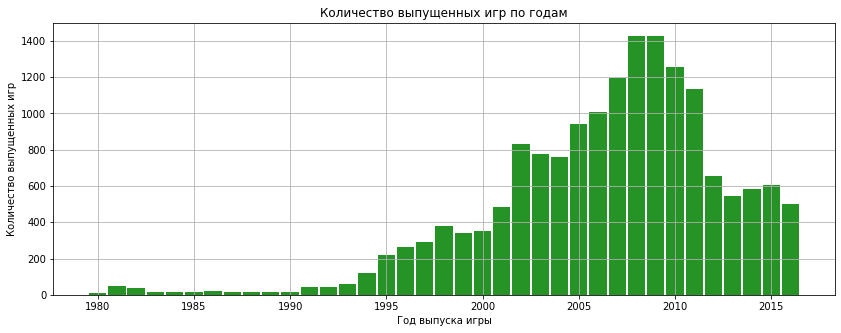

In [36]:
plt.figure(figsize=(14, 5))
plt.bar(time_release['year'], time_release['quantity'], label='Кол-во релизов за год', color='g', alpha=0.85, width=0.9)
plt.xlabel('Год выпуска игры')
plt.ylabel('Количество выпущенных игр')
plt.grid()
plt.title(f'Количество выпущенных игр по годам')
plt.show()

На графике наглядно показан пик количества выпущенных игр, который приходится на 2008 и 2009 годы. В 2012 году количество выпущенных игр резко снизилось и до 2016 года остаётся примерно на том же уровне с небольшими колебаниями. Также заметно, что рост количества выпускаемых игр начался в 1994 году.

Теперь изучим изменения в продажах по платформам. Для удобства снова создадим сгруппируем данные в отдельную таблицу.

In [37]:
plf = df.groupby('platform')['total_sales'].sum().sort_values().reset_index()

In [38]:
display(plf)

,platform,total_sales
0,PCFX,0.03
1,GG,0.04
2,3DO,0.10
3,TG16,0.16
4,WS,1.42
5,NG,1.44
6,SCD,1.86
7,DC,15.95
8,GEN,28.35
9,SAT,33.59


Для построения графика выберем платформы, которые приносили больше продаж (не менее 250). Ближайшим значением является 251.05, будет считать от платформы NES.

In [39]:
popul_platforms = plf.loc[17:30, 'platform'].values

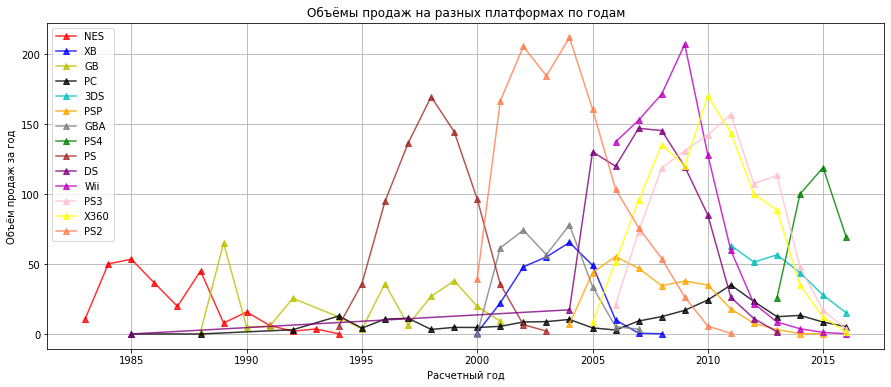

In [40]:
color = ['r','b','y','black','c','orange','grey','green','brown','purple','m','pink','yellow','coral',\
         'darkcyan','dimgray','lime'] #определим цветовую палитру грифика

plt.figure(figsize=(15, 6)) #установим размер графика
plt.grid()
plt.title('Объёмы продаж на разных платформах по годам') #его название

mean_year = 0
for i in range(0,len(popul_platforms)): #напишем функцию, которая построит график, выделяя каждую платформу разным цветом
    platform  = df.query('platform == @popul_platforms[@i]').groupby('year_of_release')['total_sales'].sum()
    mean_year += platform.count()
    platform.plot(x=platform.index, y=platform.values, style='-^', color=color[i], \
                  label=popul_platforms[i], alpha=0.8, grid=True);
plt.xlabel('Расчетный год') #подпишем ось х
plt.ylabel('Объём продаж за год') #подпишем ось у
plt.legend() #отобразим легенду графика, чтобы понимать каким цветом какая платформа обозначена
plt.show() #отобразим получившийся график

Исходя из графика можно сделать вывод, что средний срок действия платформы равен 11 лет. Убедимся в этом.

In [41]:
mean_year/len(popul_platforms)

11.214285714285714

Мы получили значение 11.2 года, округлим до целого - до 11 лет. 

Исходя из актуальных данных нам необходимо сделать прогноз на 2017 год. Можно взять срок действия платформы, но данные в сфере игр за 11 лет могут устареть. Для анализа возьмём данные за последние три года - 2014, 2015, 2016.

In [42]:
forecast = df.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum').\
              query('year_of_release>=2014').fillna(0).reset_index()
forecast['year_of_release'] = forecast['year_of_release'].astype('Int64')

for column in forecast.columns:
    if forecast[column].sum()==0:
        forecast.drop(column, axis=1,inplace=True)

Просмотрим полученную таблицу

In [43]:
display(forecast)

platform,year_of_release,3DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
0,2014,43.76,13.28,47.76,100.00,0.24,11.90,3.75,22.03,34.74,54.07
1,2015,27.78,8.52,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
2,2016,15.14,5.25,3.60,69.25,0.00,4.25,0.18,4.60,1.52,26.15


По таблице сложно отследить тенденцию роста и снижения дохода по платформам. Построим график.

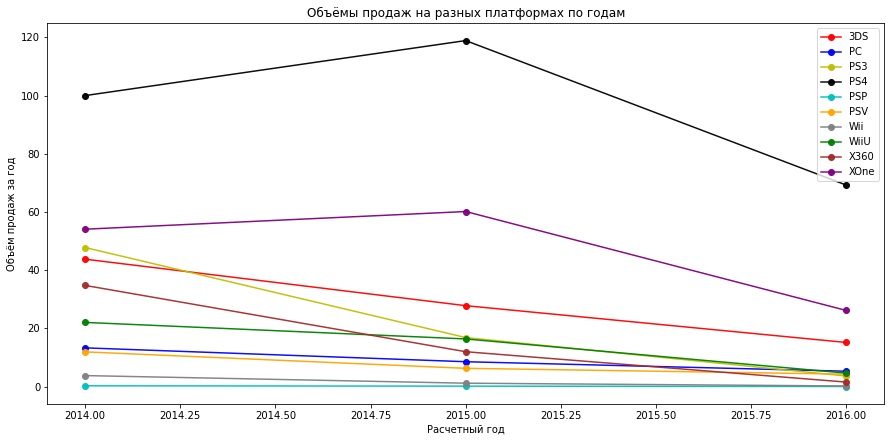

In [44]:
plt.figure(figsize=(15, 7)) #определим размер графика
plt.grid()
plt.title('Объёмы продаж на разных платформах по годам') #его название

i=0 
for column in forecast.columns[1:]: #напишем функцию для построения графика
    plt.plot(forecast['year_of_release'].to_list(), forecast[column].to_list(), label=column, marker ='o',\
             color=color[i], alpha=0.95);
    i+=1

plt.grid()
plt.xlabel('Расчетный год') #подпишем ось х
plt.ylabel('Объём продаж за год') #подпишем ось у
plt.legend() #создадим легенду графика
plt.show() #построим график

На графике заметна тенденция к общему снижению дохода с платформ. В настоящий момент самой прибыльной является платформа PS4. Несмотря на то, что объём продаж снижается, он всё ещё остаётся довольно высоким по сравнению с другими платформами. Довольно стабильными остаются PSP, PSV, PC, Wii. Определим эти платформы как потенциально прибыльные.

Следующим шагом нам необходимо построить «ящик с усами» по глобальным продажам игр в разбивке по платформам и описать его.

In [45]:
sales_platform = df.query('year_of_release>=2014').groupby('platform')['total_sales'].sum()\
            .sort_values(ascending=False).reset_index().head(10)

In [46]:
display(sales_platform)

,platform,total_sales
0,PS4,288.15
1,XOne,140.36
2,3DS,86.68
3,PS3,68.18
4,X360,48.22
5,WiiU,42.98
6,PC,27.05
7,PSV,22.40
8,Wii,5.07
9,PSP,0.36


Платформы Wii и PSP принесли меньше всего прибыли, поэтому уберём их.

In [47]:
sales_platform = sales_platform.head(8)

Теперь построим ящики с усами.

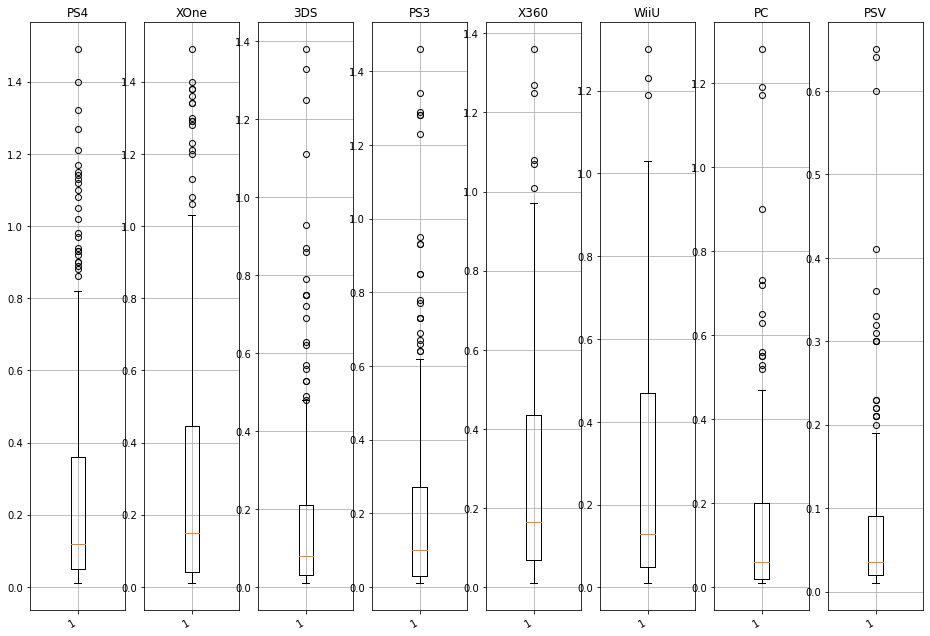

In [48]:
fig, (ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8) = plt.subplots(nrows=1, ncols=8, figsize=(16, 12))
fig.autofmt_xdate();

p = {ax1:'PS4', ax2:'XOne', ax3:'3DS', ax4:'PS3', ax5:'X360', ax6:'WiiU', ax7:'PC', ax8:'PSV'}
for ax in [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8]:
    sales = df.query('year_of_release>=2014 and platform==@p[@ax] and total_sales<1.5')['total_sales']
    ax.boxplot(sales)
    ax.grid()
    ax.set_title(p[ax])

fig.autofmt_xdate()

Продажи на популярных платформах схожи. Медианные значения продаж у четырех X360, PS3, WiiU, PS2 находятся близко к уровню 0,2, а в других 4 к уровню 0,1. На платформах PS4,3DS и WiiU большая часть проданых игр лежит до значения в 0,6-0,9, на платформах PS и PSV в районе 0,3, а в лидерах X360, XOne до 1,1 и в PS3 до 1,3млн.

In [50]:
new_df = df.loc[df['year_of_release'] >= 2014]

Отфильтруем данные нового датафрейма

In [51]:
new_df = new_df[(new_df['critic_score'] != 0.0) & (new_df['user_score'] != 0.0)]

In [82]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 704 entries, 42 to 16692
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             704 non-null    object 
 1   platform         704 non-null    object 
 2   year_of_release  704 non-null    float64
 3   genre            704 non-null    object 
 4   na_sales         704 non-null    float64
 5   eu_sales         704 non-null    float64
 6   jp_sales         704 non-null    float64
 7   other_sales      704 non-null    float64
 8   critic_score     704 non-null    float64
 9   user_score       704 non-null    float64
 10  rating           704 non-null    object 
 11  total_sales      704 non-null    float64
dtypes: float64(8), object(4)
memory usage: 71.5+ KB


Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаим корреляцию между отзывами и продажами. В качестве платформы для анализа выберем самую популярную в таблице sales_platform платформу PS4. Создадим новый датафрейм, исходя из актуальных данных.

In [52]:
ps_4 = new_df.query('platform=="PS4"')[['total_sales', 'critic_score', 'user_score']].reset_index(drop=True)

In [53]:
display(ps_4)

,total_sales,critic_score,user_score
0,12.62,97.0,8.3
1,8.58,82.0,4.3
2,7.66,83.0,5.7
3,7.60,85.0,5.0
4,7.17,87.0,6.5
...,...,...,...
229,0.01,42.0,2.3
230,0.01,70.0,6.8
231,0.01,69.0,7.5
232,0.01,61.0,7.9


Посмотрим корреляцию по всем столбцам.

In [54]:
ps_4.corr()

,total_sales,critic_score,user_score
total_sales,1.000000,0.401903,-0.043186
critic_score,0.401903,1.000000,0.546434
user_score,-0.043186,0.546434,1.000000


Теперь построим диаграммы рассеяния, изучим зависимость продаж от отзывов критиков и пользователей.

Коэффициент зависимости продаж от отзывов критиков = 0.4019028781147529


Text(0.5, 1.0, 'Зависимость продаж от отзывов критиков')

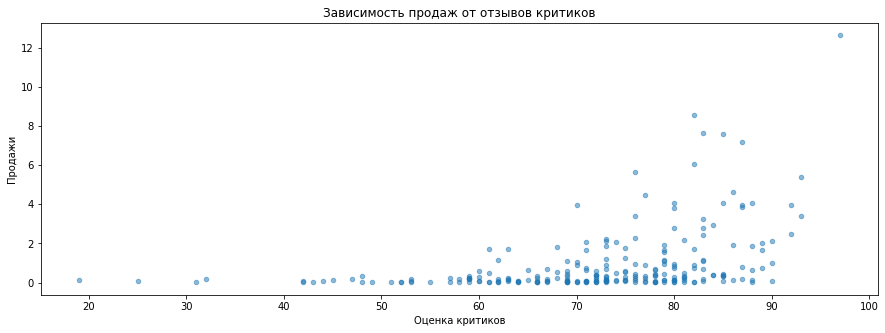

In [55]:
print('Коэффициент зависимости продаж от отзывов критиков =' , ps_4['total_sales'].corr(ps_4['critic_score']))
ps_4.plot(x='critic_score',y='total_sales',kind='scatter',figsize=(15,5), alpha=0.5)
plt.xlabel('Оценка критиков')    
plt.ylabel('Продажи')
plt.title('Зависимость продаж от отзывов критиков')

Коэффициент зависимости продаж от отзывов пользователей = -0.0431858599719363


Text(0.5, 1.0, 'Зависимость продаж от отзывов пользователей')

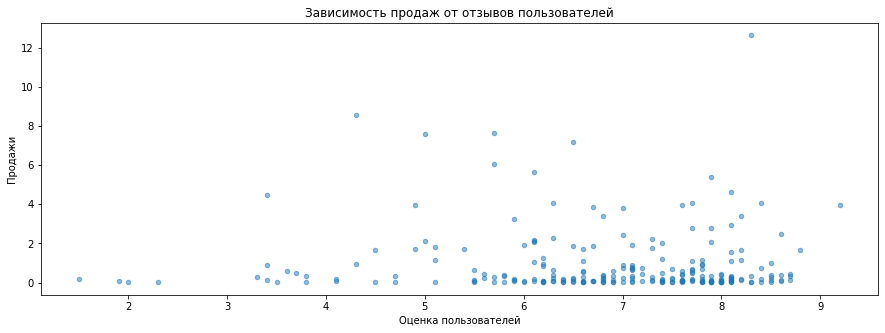

In [56]:
print('Коэффициент зависимости продаж от отзывов пользователей =' , ps_4['total_sales'].corr(ps_4['user_score']))
ps_4.plot(x='user_score',y='total_sales',kind='scatter',figsize=(15,5), alpha=0.5)
plt.xlabel('Оценка пользователей')    
plt.ylabel('Продажи')
plt.title('Зависимость продаж от отзывов пользователей')

Оценки критиков демонстрируют прямую, средне-слабую корреляцию с продажами (0,4). Оценки пользователей корреляции с продажами не имеют.

Посмотрим соотношение с продажами игр на других платформах. Для этого создадим словарь.

In [85]:
score_sales = {}
for p in sales_platform['platform']:
    score_sales[p] = new_df.query('platform==@p')[['total_sales', 'critic_score', 'user_score']].dropna().reset_index(drop=True)

Добавим в таблицу с популярными платформами информацию о кореляции продаж.

In [86]:
i=0
corr_platform = pd.DataFrame(columns=['platform','critic_sales','user_sales'])
for pl_name in score_sales.keys():
    corr_platform.loc[i, 'platform'] = pl_name
    corr_platform.loc[i, 'critic_sales'] = score_sales[pl_name]['total_sales'].corr(score_sales[pl_name]['critic_score'])
    corr_platform.loc[i, 'user_sales'] = score_sales[pl_name]['total_sales'].corr(score_sales[pl_name]['user_score'])
    i+=1

In [87]:
display(corr_platform)

,platform,critic_sales,user_sales
0,PS4,0.401903,-0.043186
1,XOne,0.422112,-0.091734
2,3DS,0.284686,0.27985
3,PS3,0.446575,0.156595
4,X360,0.525723,0.336514
5,WiiU,0.37564,0.411451
6,PC,0.172061,-0.089974
7,PSV,0.041029,0.023528


Теперь построим диаграмму рассеяния зависимости продаж от отзывов критиков.

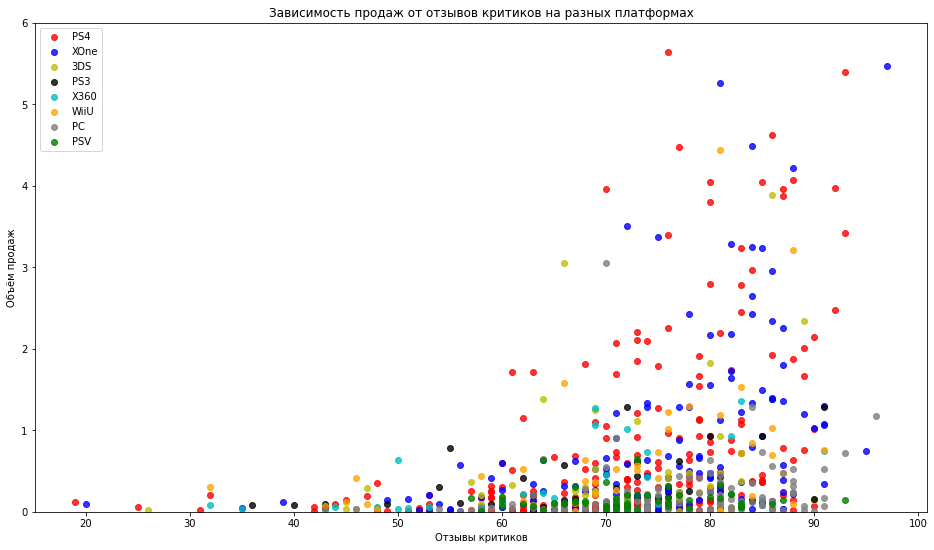

In [88]:
plt.figure(figsize=(16, 9))
plt.grid()
plt.title('Зависимость продаж от отзывов критиков на разных платформах')
i=0
for p in corr_platform['platform']:
    xc = score_sales[p]['critic_score'].to_list()
    yc = score_sales[p]['total_sales'].to_list()
    plt.scatter(xc, yc, label=p, color=color[i], alpha=0.8);
    i+=1 
plt.ylim(0,6)
plt.grid()
plt.xlabel('Отзывы критиков')    
plt.ylabel('Объём продаж')
plt.legend()
plt.show()

И диаграмму рассеяния зависимости продаж от отзывов пользователей.

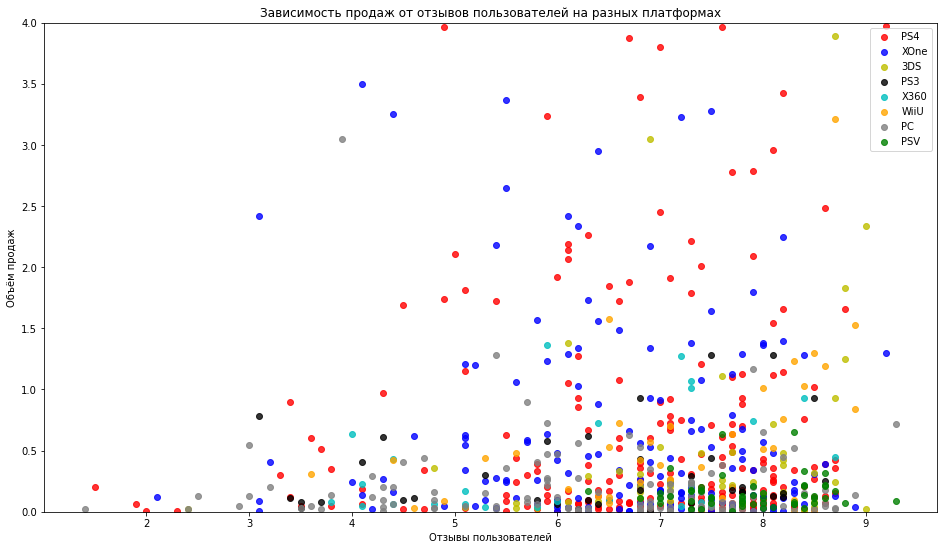

In [89]:
plt.figure(figsize=(16, 9))
plt.grid()
plt.title('Зависимость продаж от отзывов пользователей на разных платформах')
i=0
for p in corr_platform['platform']:
    xc = score_sales[p]['user_score'].to_list()
    yc = score_sales[p]['total_sales'].to_list()
    plt.scatter(xc, yc, label=p, color=color[i], alpha=0.8);
    i+=1 
plt.ylim(0,4)
plt.grid()
plt.xlabel('Отзывы пользователей')    
plt.ylabel('Объём продаж')
plt.legend()
plt.show()

На других платформах распределение похоже на распределение зависимости продаж от  отзывов самой популярной платформы. Зависимость продаж пропорциональная, от отзывов пользователей значительно слабее, чем от отзывов критиков критиков.

Далее необходимо изучить распределение игр по жанрам.

In [90]:
genres = new_df.groupby('genre')['name'].count().sort_values(ascending=False)

In [91]:
display(genres)

genre
Action          227
Role-Playing     97
Shooter          87
Sports           83
Racing           45
Adventure        34
Misc             32
Fighting         31
Platform         26
Simulation       20
Strategy         18
Puzzle            4
Name: name, dtype: int64

Посчитаем продажи исходя из жанра.

In [92]:
genre_sales = new_df.groupby('genre')['total_sales'].median().sort_values(ascending=False)

In [93]:
display(genre_sales)

genre
Shooter         0.620
Sports          0.430
Misc            0.320
Action          0.160
Role-Playing    0.160
Platform        0.155
Fighting        0.150
Simulation      0.150
Racing          0.130
Strategy        0.105
Adventure       0.065
Puzzle          0.040
Name: total_sales, dtype: float64

Для наглядности построим круговую диаграмму.

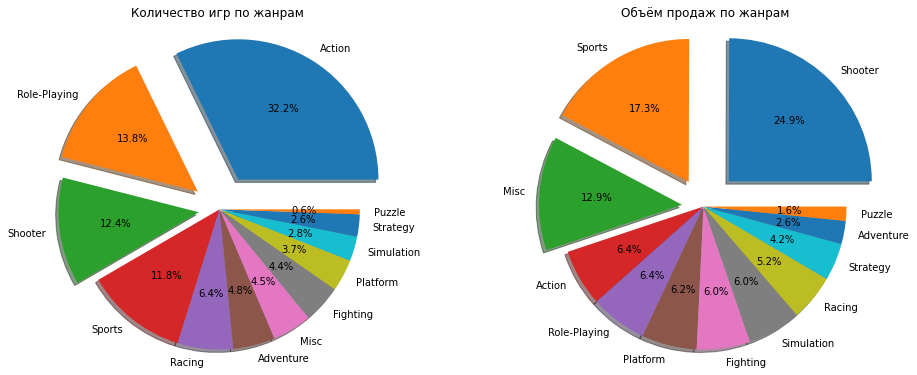

In [95]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16, 7))
fig.autofmt_xdate();

labels1 = genres.index
sizes1 = genres.values

labels2 = genre_sales.index
sizes2 = genre_sales.values
explode = (0.25, 0.2, 0.15, 0,0,0,0,0,0,0,0,0)
ax1.set_title('Количество игр по жанрам')
ax1.pie(sizes1, labels=labels1, autopct='%1.1f%%',
        shadow=True, explode=explode,startangle=0)  
ax1.axis('equal') 

ax2.set_title('Объём продаж по жанрам')
ax2.pie(sizes2, labels=labels2, autopct='%1.1f%%',
        shadow=True, explode=explode,startangle=0) 
ax2.axis('equal')

plt.show()

Самым прибыльным жанром является Shooter (24,9%), далее расположен Sports (17,3%) и на третьем месте Misc (12,9%). Заметно, что игр в жанрах Action и Role-Playing прдставлено больше всего - 32,2% и 13,8% соответственно. При этом самый популярный по количеству выпущенных игр Action занимает только четвёртый уровень по продажам (6,4%). По количеству выпущенных игр самый популярный жанр Shooter занимает 3 место из 12 (12,4%).
Последние по популярности жанры - Puzzle, Strategy и Simulation. В уровне прибыли они находятся на 12, 10 и 8 местах.

### Вывод

В ходе исследовательского анализа данных мы посмотрели сколько игр выпускалось в разные годы, годы, в которые было выпущено больше всего игр, изучили, как менялись продажи по платформам. На основании предыдущих действий выделили актуальный период, на основании которого сделали прогноз лидеров по продажам, платформ с наиболее стабильной прибылью. Также мы изучили зависимость продаж от отзывов критиков и пользователей, в результате чего выяснили, что есть пропорциональная зависимость, но слабовыраженная. Изучили уровень продаж по различным жанрам, выделели самые популярные и непопулярные жанры.

## Портрет пользователя каждого региона

Создадим словарь, в который запишем данные по регионам по пяти наиболее популярным платформам.

In [96]:
popular_platform = {}
for region in ['na_sales', 'eu_sales', 'jp_sales']:
    popular_platform[region] = new_df.groupby('platform')[region].sum().sort_values(ascending=False).head(5)

In [97]:
display(popular_platform)

{'na_sales': platform
 PS4     74.79
 XOne    66.71
 WiiU    14.94
 3DS      7.80
 PC       6.89
 Name: na_sales, dtype: float64,
 'eu_sales': platform
 PS4     101.69
 XOne     38.03
 PC       15.24
 WiiU     10.64
 3DS       5.25
 Name: eu_sales, dtype: float64,
 'jp_sales': platform
 3DS     9.94
 PS4     8.49
 WiiU    5.78
 PSV     4.06
 PS3     1.77
 Name: jp_sales, dtype: float64}

Отразим данные на круговых диаграммах.

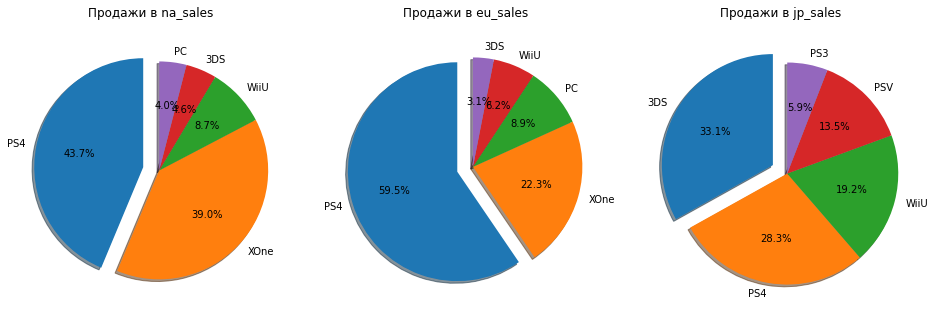

In [98]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(16, 6))
fig.autofmt_xdate();

i = 0
x = [ax1, ax2, ax3]
region = ['na_sales', 'eu_sales', 'jp_sales']
explode = (0.15, 0, 0, 0, 0)

for i in [0,1,2]:
    labels = popular_platform[region[i]].index
    sizes = popular_platform[region[i]].values
    ax = x[i]
    ax.set_title(f'Продажи в {region[i]}')
    ax.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, explode=explode,startangle=90) 
    ax.axis('equal')  

plt.show()

Мы видим, что популярность платформ в каждом регионе разные, совпадений по популярности платформ нет. В Америке самой популярной платформой является PS4 (43,7%), в Европе также популярна платформа PS4 (59,5%), в Японии - 3DS (33,1%). Также следует отметить, что платформа PS4 пользуется популярностью и в Японии (28,3%). В Америке и в Европе второй по пулярности является платформа XOne с распределением 39% и 22,3%.

Теперь рассмотрим популярность жанров в зависимости от региона. Для этого снова используем словарь.

In [99]:
popul_genre = {}
for region in ['na_sales', 'eu_sales', 'jp_sales']:
    popul_genre[region] = new_df.groupby('genre')[region].mean().sort_values(ascending=False).head(5)

In [100]:
display(popul_genre)

{'na_sales': genre
 Shooter         0.588276
 Sports          0.398193
 Action          0.221806
 Platform        0.218462
 Role-Playing    0.190000
 Name: na_sales, dtype: float64,
 'eu_sales': genre
 Shooter       0.490115
 Sports        0.403855
 Simulation    0.273000
 Racing        0.243778
 Action        0.232863
 Name: eu_sales, dtype: float64,
 'jp_sales': genre
 Platform        0.097692
 Simulation      0.091500
 Role-Playing    0.090928
 Puzzle          0.065000
 Fighting        0.052258
 Name: jp_sales, dtype: float64}

Отобразим данные на круговых диаграммах.

/tmp/ipykernel_61/3445513727.py:14: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  ax.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, explode=explode,startangle=90)


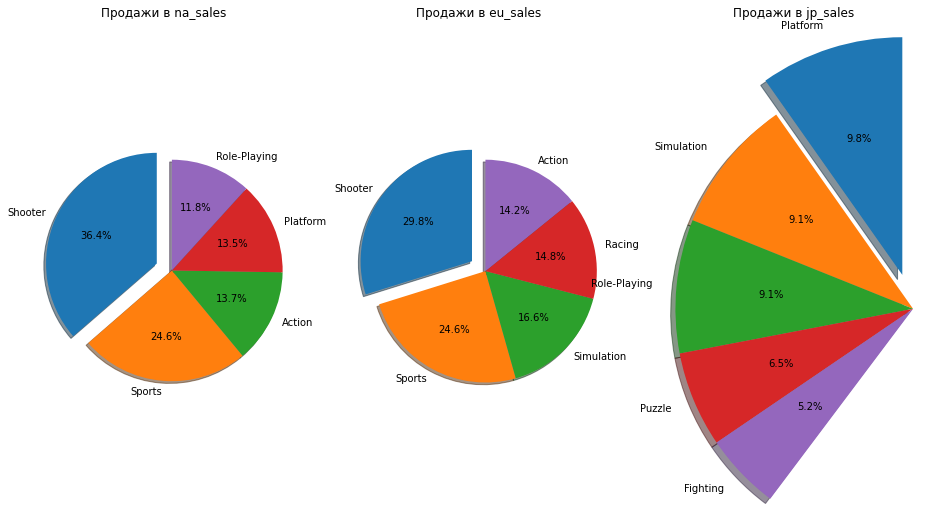

In [101]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(16, 10))
fig.autofmt_xdate();

i = 0
x = [ax1, ax2, ax3]
region = ['na_sales', 'eu_sales', 'jp_sales']
explode = (0.15, 0, 0, 0, 0)

for i in [0,1,2]:
    labels = popul_genre[region[i]].index
    sizes = popul_genre[region[i]].values
    ax = x[i]
    ax.set_title(f'Продажи в {region[i]}')
    ax.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, explode=explode,startangle=90) 
    ax.axis('equal')  

plt.show()

Мы видим, что популярные жанры в Америке и в Европе схожи, отличается их распределение. В Америке и в Европе самый популярный жанр Shooter, далее расположен Sports, третье место в Америке занимает Action, на четвертом месте Platform, замыкает пятёрку жанр Role Playind. В Европе третье место занимает Simulation, за ним следует Racing, последним находится Action. В Японии рейтинг жанров заметно отличается. Platform является самым популярным жанром, далее расположен Simulation, третье место занимает жанр Role Playind, потом Puzzle, завершает Fighting.

Посмотрим на зависимость продаж от рейтинга ESRB. 

In [102]:
esrb_sale = new_df.groupby('rating')['na_sales', 'eu_sales', 'jp_sales'].sum()\
              .sort_values(by='na_sales', ascending=False).reset_index()

/tmp/ipykernel_61/1091409084.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  esrb_sale = new_df.groupby('rating')['na_sales', 'eu_sales', 'jp_sales'].sum()\


In [103]:
display(esrb_sale)

,rating,na_sales,eu_sales,jp_sales
0,M,85.62,84.18,6.84
1,E,38.25,45.87,8.28
2,T,34.56,31.16,10.87
3,E10+,23.32,16.75,4.22
4,Unknown,0.75,1.61,0.14


Ассоциация ESRB определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию. Расшифровка обозначений рейтинга:
«E» («Everyone») — «Для всех»
«T» («Teen») — «Подросткам»
«M» («Mature») — «Для взрослых»
«E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»
«EC»(«K-A» - в ранних версиях с 1994-1997 годы) («Early childhood») — «Для детей младшего возраста»
«AO» («Adults Only 18+») — «Только для взрослых»
«RP» («Rating Pending») — «Рейтинг ожидается»

Во всех регионах лидируют 4 основных рейтинга - Е, Т, М, Е10+, различается только сумма продаж. Часть занимают игры с неопределённым  рейтингом.

В Америке и в Европе самой популярной категорией является «Для взрослых», в Японии - «Подросткам».

### Вывод

Итак, опишем пользователей разных регионов.

Америка:
Предпочитает жанры игр Shooter и Sports, размещённые на платформе PS4 и XOne, с возрастным рейтингом «Для взрослых».

Европа:
Пользователь также выбирает жанры Shooter и Sports, размещённые на платформах PS4 и XOne, с возрастным рейтингом «Для взрослых».

Япония:
Популярностью пользуются игры в жанре Platform, чуть менее популярен жанр Simulation на платформе 3DS и PS4, с возрастным рейтингом, в отличии от других регионов, «Подросткам».

## Проверка гипотез

В ходе выполнения этой части проекта нам необходимо проверить следующие гипотезы:
- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Средние пользовательские рейтинги жанров Action и Sports разные.

Проверку начнём с гипотезы, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые. Обозначим её в качестве нулевой гипотезы, а альтернативной будет гипотеза о том, что средние пользовательские рейтинги платформ Xbox One и PC различаются.

Для начала сделаем срез данных по исследуемым платформам.

In [104]:
XOne = new_df.query('platform == "XOne" ')['user_score'].dropna().to_list()
PC = new_df.query('platform == "PC" ')['user_score'].dropna().to_list()

Теперь проверим гипотезы:
H0: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
H1: Средние пользовательские рейтинги платформ Xbox One и PC различаются.

In [105]:
alpha = 0.05

results = st.ttest_ind(XOne, PC, equal_var = False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.1403785186826978
Не получилось отвергнуть нулевую гипотезу


Р-значение получилось значимым, у нас нет оснований утверждать, что средние пользовательские рейтинги платформ Xbox One и PC значимо различаются.

Перейдём к проверке второй гипотезы, что средние пользовательские рейтинги жанров Action и Sports разные. Обозначим её в качестве нулевой, а альтернативную сформулируем как средние пользовательские рейтинги жанров Action и Sports одинаковые.

Для начала также сделаем срез данных по исследуемым платформам.

In [106]:
Action = new_df.query(' genre == "Action" ')['user_score'].dropna().to_list()
Sports = new_df.query(' genre == "Sports" ')['user_score'].dropna().to_list()

Перейдём к непосредственной проверке гипотез:
Н0: Средние пользовательские рейтинги жанров Action и Sports разные.
Н1: Средние пользовательские рейтинги жанров Action и Sports одинаковые.

In [107]:
alpha = 0.05

results = st.ttest_ind(Action, Sports, equal_var = True)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 4.0540895999943536e-10
Отвергаем нулевую гипотезу


После проверки гипотезы у нас нет оснований утверждать, что средние пользовательские рейтинги жанров Action и Sports значимо различаются.

### Вывод

В ходе проверки гипотез мы выяснили, что средние пользовательские рейтинги платформ Xbox One и PC различаются, а вот средние пользовательские рейтинги жанров Action и Sports одинаковые.

## Итоги исследования

**В ходе выполнения проекта мы:**
- Подготовили данные для исследования
- Рассмотрели количество выпущенных игр по годам, нашли годы с самой большой численностью выпущенных игр
- Изучили продажи по различным платформам
- Выявили актуальный период и на его основании сделали прогноз на 2017 год
- Составили портрет пользователей каждого региона
- Проверили гипотезы
- Сделали выводы

Пик количества выпущенных игр приходится на 2008 и 2009 годы. В 2012 году количество выпущенных игр резко снизилось и до 2016 года остаётся примерно на том же уровне с небольшими колебаниями. Также мы выяснили, что рост количества выпускаемых игр начался в 1994 году.

В ходе проведения исследования мы выявили тенденцию к снижению уровня дохода платформ. В настоящий момент самой прибыльной является платформа PS4. Несмотря на то, что объём продаж снижается, он всё ещё остаётся довольно высоким по сравнению с другими платформами. Довольно стабильными остаются PSP, PSV, PC, Wii. В 2017 году следует размещать игры на стабильных платформах (PSP, PSV, PC, Wii), а также можно разместить на PS4, но доход от неё будет ниже, чем в 2016 году.

Оценки критиков демонстрируют прямую, средне-слабую корреляцию с продажами (0,4). Оценки пользователей корреляции с продажами не имеют.

Самым прибыльным жанром является Shooter (24,9%), далее расположен Sports (17,3%) и на третьем месте Misc (12,9%).

В зависимости от региона пользуются популярностью различные платформы. В Америке самой популярной платформой является PS4 (43,7%), в Европе также популярна платформа PS4 (59,5%), в Японии - 3DS (33,1%). Также следует отметить, что платформа PS4 пользуется популярностью и в Японии (28,3%). В Америке и в Европе второй по пулярности является платформа XOne с распределением 39% и 22,3%.

Популярные жанры в Америке и в Европе схожи, отличается их распределение. В Америке и в Европе самый популярный жанр Shooter, далее расположен Sports, третье место в Америке занимает Action, на четвертом месте Platform, замыкает пятёрку жанр Role Playind. В Европе третье место занимает Simulation, за ним следует Racing, последним находится Action. В Японии рейтинг жанров заметно отличается. Platform является самым популярным жанром, далее расположен Simulation, третье место занимает жанр Role Playind, потом Puzzle, завершает Fighti

Во всех регионах лидируют 4 основных рейтинга - Е, Т, М, Е10+, различается только сумма продаж. Также разница в том, что в Америке и в Европе самой популярной категорией является «Для взрослых», в Японии - «Подросткам».

В ходе проверки гипотез выяснили, что у нас нет оснований утверждать, что средние пользовательские рейтинги платформ Xbox One и PC значимо различаются, как и средние пользовательские рейтинги жанров Action и Sports.

В рекомендации по продажам игр для получения наибольшего уровня продаж и, соответственно, прибыли хочу порекомендовать следующее:
**Для продаж в Америке** увеличить выпуск игр в жанрах Shooter и Sports, для продажи размещать на платформах PS4 и XOne, ориентироваться необходимо на возрастной рейтинг "Для взрослых". 

**Для продаж в Европе** увеличить выпуск игр в жанрах Shooter и Sports, для продажи размещать их на платформах PS4 и XOne, ориентироваться необходимо на возрастной рейтинг "Для взрослых". 

**Для продаж в Японии** увеличить выпуск игр в жанрах Platform и Simulation, для продажи размещать на платформах 3DS и PS4, ориентироваться необходимо на возрастной рейтинг "Подросткам".